# IMDB Dataset: Aspect-Based Sentiment Analysis

The IMDB dataset is known for its large size, real-world movie reviews, and well-labelled sentiment, making it ideal for both basic sentiment classification and advanced NLP tasks like ABSA.

The IMDB Movie Reviews Dataset contains 50,000 movie reviews from IMDB.com, labeled as positive or negative.
It is balanced with:
- 25,000 reviews for training (12.5k positive, 12.5k negative)
- 25,000 reviews for testing (12.5k positive, 12.5k negative)

# Exploratory Data Analysis of the IMDB Dataset

## 1. Load & preview the dataset

In [1]:
import pandas as pd

df = pd.read_csv('/home/aastha/Documents/Work/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
print(f"The shape of the dataset is: {df.shape}")
print(f"The columns in the dataset are: {df.columns}")


The shape of the dataset is: (50000, 2)
The columns in the dataset are: Index(['review', 'sentiment'], dtype='object')


#### Let's look at the distribution of the sentiment labels

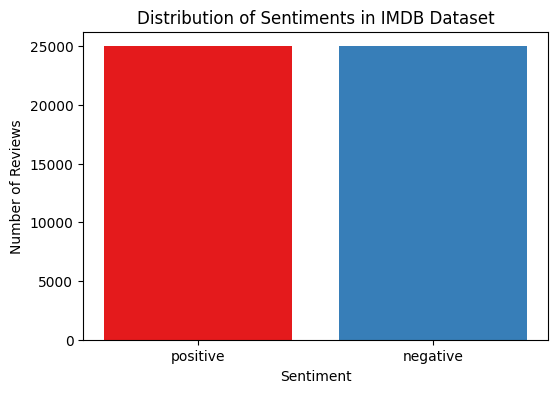

In [3]:
import matplotlib.pyplot as plt

# Get sentiment counts
sentiment_counts = df['sentiment'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#E41A1C', '#377EB8'])  # similar to Set1
plt.title('Distribution of Sentiments in IMDB Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

### Both categories of sentiment (`positive` and `negative`) are balanced: 25,000 each

#### What's the average length of a review?

In [4]:
# adding a new column to calculate the length of the review
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Display average, min, and max review length
print("Average review length:", df['review_length'].mean())
print("Minimum review length:", df['review_length'].min())
print("Maximum review length:", df['review_length'].max())

# Optional: describe() for summary statistics
print(df['review_length'].describe())

Average review length: 231.15694
Minimum review length: 4
Maximum review length: 2470
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


# Reviews are around `231` words long on average, ranging from 4-2470 words

In [5]:
import plotly.express as px

fig = px.histogram(df, x='review_length', nbins=50,
                   title='Distribution of Review Lengths',
                   labels={'review_length': 'Number of Words'},
                   color_discrete_sequence=['blue'],
                   hover_data={'review_length': True})

# Add black edge to bars using marker properties
fig.update_traces(marker=dict(line=dict(color='black', width=2)))

fig.show()

## Cleaning the Data

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# defining the cleaning function

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    # join back to string
    return ' '.join(tokens)

# applying the cleaning function to the review column

df['clean_review'] = df['review'].apply(clean_text)

# Preview original vs cleaned
print(df[['review', 'clean_review']].head())

[nltk_data] Downloading package stopwords to /home/aastha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewers mentioned watching 1 oz episode ...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


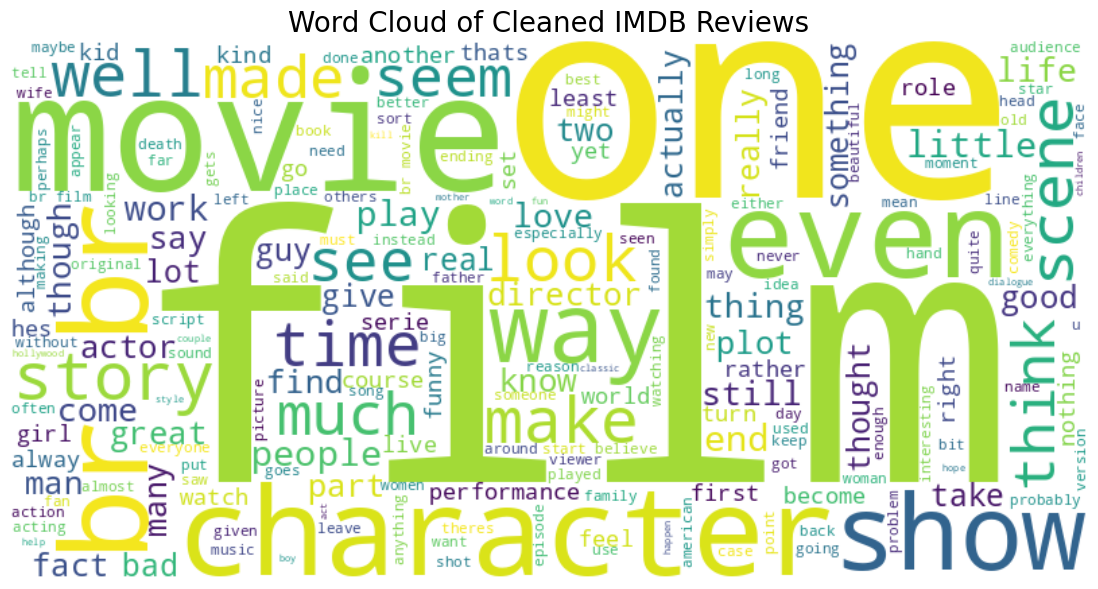

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into one string
all_text = ' '.join(df['clean_review'])

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='viridis'  # You can try others: 'plasma', 'inferno', 'Set2', etc.
).generate(all_text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned IMDB Reviews', fontsize=20)
plt.show()

## The most discussed themes revolve around characters, plot and performance.
Top prominent words include:

- "movie", "film", "character", "story", "scene", "show", "plot", "director": highlight that reviewers focus heavily on narrative elements and direction.

- "actor", "performance", "role", "part": indicate that acting and casting are central to users’ sentiments.

- "time", "way", "look", "make", "see", "think": these may relate to viewers’ interpretation of pacing, style, or emotional impact.

- "bad", "great", "good", "love", "funny", "thought", "interesting" suggest strong opinions and emotional tone; valuable for sentiment classification.

- "real", "life", "world", "feel" hint that realism and emotional connection are often discussed.

In [8]:
from sklearn.model_selection import train_test_split

# split data for test and training dataset
X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=0.3, random_state=42)

# Store the results of each model in a DataFrame
result_summary = pd.DataFrame(columns=['Model','Precision','Recall'])

In [9]:
df.head()

,review,sentiment,review_length,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love time money visually stunni...


# DL Baseline Sentiment Classifier

In [28]:
print(f"{X_train.shape =}, {y_train.shape =}")
print(f"{X_test.shape =}, {y_test.shape =}")

X_train.shape =(5550,), y_train.shape =(5550,)
X_test.shape =(1388,), y_test.shape =(1388,)


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os

# Hyperparameters
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 100

# preparing the data

texts = df['clean_review'].tolist()
labels = df['sentiment'].map({'positive': 1, 'negative': 0}).tolist()

# tokenize + pad sequences
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# loading the GloVe embeddings

embeddings_index = {}
glove_path = 'glove.6B.100d.txt'  # can be downloaded from: http://nlp.stanford.edu/data/glove.6B.zip

with open(glove_path, 'r', encoding='utf8') as f:
    for line in tqdm(f, desc="Loading GloVe"):
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# creating the embedding matrix
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("Mean:", np.mean(embedding_matrix))
print("Std Dev:", np.std(embedding_matrix))
print("Any NaNs:", np.isnan(embedding_matrix).any())



Loading GloVe: 400000it [00:04, 89832.64it/s]

Mean: -0.004514400247418688
Std Dev: 0.5071164217878249
Any NaNs: False


In [31]:
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE,
              output_dim=EMBEDDING_DIM,
              weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH,
              trainable=False),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, np.array(y_train),
                    validation_data=(X_test, np.array(y_test)),
                    epochs=5,
                    batch_size=64)

y_test = np.array(y_test).astype('float32')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/home/aastha/Documents/Work/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 125ms/step - accuracy: 0.6039 - loss: 0.6591 - val_accuracy: 0.7485 - val_loss: 0.5342
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.7724 - loss: 0.5004 - val_accuracy: 0.8024 - val_loss: 0.4120
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 114ms/step - accuracy: 0.8239 - loss: 0.4035 - val_accuracy: 0.8075 - val_loss: 0.4005
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.8430 - loss: 0.3734 - val_accuracy: 0.8435 - val_loss: 0.3540
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.8579 - loss: 0.3385 - val_accuracy: 0.8575 - val_loss: 0.3302
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8663 - loss: 0.3192
Test Loss: 0.33024507761001587
Test Accuracy: 0.8575000166893005


In [ ]:
y_test = np.array(y_test).astype('float32')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.8703 - loss: 0.3132
Test Loss: 0.32420575618743896
Test Accuracy: 0.8666999936103821


### The test accuracy of the baseline model is `86.67%`

Test Loss: 0.32420575618743896
Test Accuracy: 0.8666999936103821


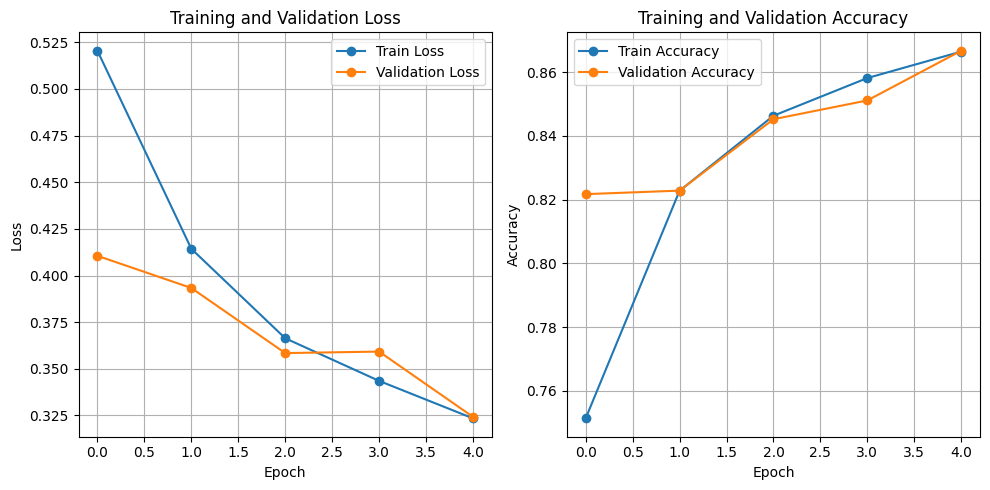

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step


In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
test_predictions_probs = model.predict(X_test)
test_predictions = (test_predictions_probs > 0.5).astype(int) # Convert probabilities to binary predictions

# Structuring the Piplelne for ABSA

### 1. Aspect Extraction (noun chunks)

In [17]:
import spacy

# Load English spaCy model
nlp = spacy.load("en_core_web_sm")


def extract_aspects(text):
   doc = nlp(text)
   aspects = [chunk.text.lower() for chunk in doc.noun_chunks if len(chunk.text.split()) < 4]
   return aspects

# Apply to a sample
sample_review = df['review'].iloc[10]
print(f"REVIEW:, {sample_review}")
print(f"ASPECTS:, {extract_aspects(sample_review)}")

/home/aastha/Documents/Work/myenv/lib/python3.12/site-packages/torch/cuda/__init__.py:716: UserWarning:

Can't initialize NVML



REVIEW:, Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"
ASPECTS:, ['phil', 'the alien', 'those quirky films', 'the humour', 'the oddness', 'everything', 'actual punchlines.<br', 'it', 'the movie', 'i', 'the jokes', 'that', 'a problem', 'itself', 'i', 'interest.<br', '/>i', 'this film', 'a stoner', 'who', 'partaking.<br', 'something', 'brother', 'another planet']


### 2. Extracting the Sentences (Context) per Aspect

In [18]:
def extract_aspect_sentences(text, aspects):
    doc = nlp(text)
    aspect_sentences = []
    for sent in doc.sents:
        for asp in aspects:
            if asp in sent.text.lower():
                aspect_sentences.append((asp, sent.text.strip()))
                break # One aspect match per sentence
    return aspect_sentences

#### Let's try it on a real review (from our dataset)

In [20]:
aspects = extract_aspects(sample_review)
aspect_sents = extract_aspect_sentences(sample_review, aspects)
for asp, sent in aspect_sents:
    print(f"[{asp}] ---> {sent}")

[phil] ---> Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At
[it] ---> first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br
[i] ---> />I imagine this film would appeal to a stoner who is currently partaking.<br /><br
[i] ---> />For something similar but better try "Brother from another planet"


### 3. Rule-Based Sentiment Labeling

In [21]:
from textblob import TextBlob

def label_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# apply to aspect sentences
labeled_data = []
for asp, sent in aspect_sents:
    sentiment = label_sentiment(sent)
    labeled_data.append((asp, sent, sentiment))

# show a few
for asp, sent, label in labeled_data:
    print(f"[{asp}] - ({label}): {sent}")

[phil] - (neutral): Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At
[it] - (positive): first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br
[i] - (neutral): />I imagine this film would appeal to a stoner who is currently partaking.<br /><br
[i] - (positive): />For something similar but better try "Brother from another planet"


### 4. Preparing the Data for the model

In [22]:
from tqdm.notebook import tqdm

# Sampling the IMDB data
sample_df = df.sample(1000, random_state=42)

# Generate context-sentiment pairs
aspect_data = []

for review in tqdm(sample_df['review']):
    aspects = extract_aspects(review)
    aspect_sents = extract_aspect_sentences(review, aspects)
    for asp, sent in aspect_sents:
        sentiment = label_sentiment(sent)
        aspect_data.append((asp, sent, sentiment))
# Create DataFrame
absa_df = pd.DataFrame(aspect_data, columns=['aspect', 'sentence', 'sentiment'])
absa_df = absa_df[absa_df['sentiment'] != 'neutral'] # Optional: filter out neutral

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
# Preview
print(absa_df.head())

{"model_id": "173e65e29c454a4b90297062d7d404ee", "version_major": 2, "version_minor": 0}

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Extract X and y
X_texts = absa_df['sentence'].values
y_labels = absa_df['sentiment'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_texts, y_encoded, test_size=0.2, random_state=42)

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

  aspect                                           sentence sentiment
0      i  I really liked this Summerslam due to the look...  positive
1      i  Anyways, this could have been one of the best ...  positive
2      i                   but I'm glad times have changed.  positive
3      i  It was a terrible main event just like every m...  negative
4      i  Other matches on the card were Razor Ramon vs ...  negative


## Defining the `ABSA` model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen),
    # 1. bidirectional LSTM for better context capture
    Bidirectional(LSTM(256, return_sequences=True)),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64, return_sequences=True)),

    # 2. global max pooling (captures most prominent features)
    GlobalMaxPooling1D(),

    # 3. dense layer with dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),

    # 4. Output layer
    Dense(3, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32
)
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10


/home/aastha/Documents/Work/myenv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



174/174 ━━━━━━━━━━━━━━━━━━━━ 127s 657ms/step - accuracy: 0.5996 - loss: 0.7823 - val_accuracy: 0.6967 - val_loss: 0.6362
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 113s 650ms/step - accuracy: 0.6662 - loss: 0.6614 - val_accuracy: 0.6967 - val_loss: 0.6172
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 114s 656ms/step - accuracy: 0.6847 - loss: 0.6111 - val_accuracy: 0.7378 - val_loss: 0.4914
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 115s 661ms/step - accuracy: 0.7921 - loss: 0.4385 - val_accuracy: 0.8343 - val_loss: 0.3829
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 114s 657ms/step - accuracy: 0.9297 - loss: 0.2242 - val_accuracy: 0.8588 - val_loss: 0.3626
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 114s 657ms/step - accuracy: 0.9697 - loss: 0.1161 - val_accuracy: 0.8811 - val_loss: 0.3583
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 115s 661ms/step - accuracy: 0.9839 - loss: 0.0644 - val_accuracy: 0.8941 - val_loss: 0.3515
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 115s 661ms/step - accuracy: 0.9894 - loss: 0.04

### Plotting the performance of the ABSA model

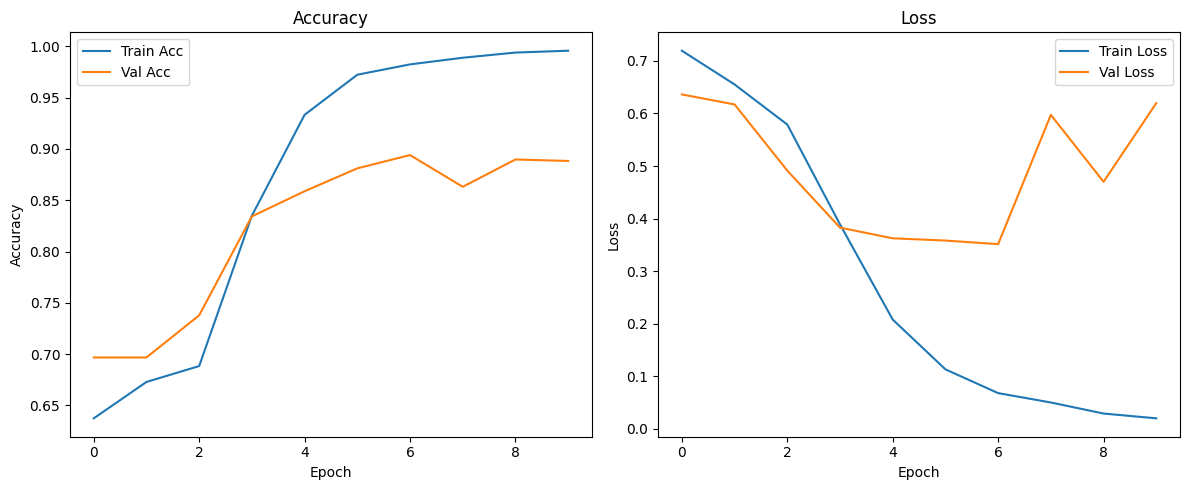

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Comparative Analysis: Baseline vs. ABSA-Enhanced Sentiment Model
To evaluate the effectiveness of extending basic sentiment analysis with Aspect-Based
Sentiment Analysis (ABSA), I have compared both models on accuracy and functionality:


  **Model Type**          | **Test Accuracy**    |      **Remarks** |
|-------------------------|----------------------|------------------|
| Baseline DL classifier  | 85.75%               | Strong overall sentiment classification |
| ABSA-enhanced Model     | 88.83%               | Provides fine-grained sentiment per aspect |